In [227]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib as plt

In [228]:
df_country = pd.read_csv('countries-2021.csv')

In [229]:
df_1 = df_country.drop([1,3,5]) # default by rows # do not change the raw dataframe
# df_country.drop([1,3,5], inplace=True) # the raw is changed



In [230]:
df_2 = df_country.drop(['gdp', 'area'], axis= 1)

In [231]:
df_housing_dirty = pd.read_csv('housing-dirty.csv')

In [232]:
df_housing_dirty.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880,NaN,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21.0,7099,NaN,2401,1138,8.3014,35850000,NEAR BAY
2,-122.24,37.85,52.0,1467,NaN,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52.0,1274,NaN,558,219,5.6431,34130000,NEAR BAY
4,-122.25,37.85,52.0,1627,NaN,565,259,3.8462,342200,NEAR BAY


In [233]:
# given the high null value percentage
df_housing_dirty.isnull().sum()/len(df_housing_dirty)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000727
total_rooms           0.000000
total_bedrooms        0.875436
population            0.000000
households            0.000000
median_income         0.000145
median_house_value    0.000000
ocean_proximity       0.000969
dtype: float64

In [234]:
df_housing_dirty.drop(['total_bedrooms'], axis=1, inplace=True)
df_housing_dirty.isnull().sum()

longitude              0
latitude               0
housing_median_age    15
total_rooms            0
population             0
households             0
median_income          3
median_house_value     0
ocean_proximity       20
dtype: int64

In [235]:
df_housing_dirty.dropna(subset=['median_income'], inplace= True)

In [236]:
df_housing_dirty.isnull().sum()

longitude              0
latitude               0
housing_median_age    15
total_rooms            0
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity       20
dtype: int64

In [237]:
avg_age = df_housing_dirty.housing_median_age.mean()


In [238]:
avg_age

28.625594025797692

In [239]:
df_housing_dirty.housing_median_age.fillna(avg_age, inplace=True)


In [240]:
df_housing_dirty.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity       20
dtype: int64

<AxesSubplot:>

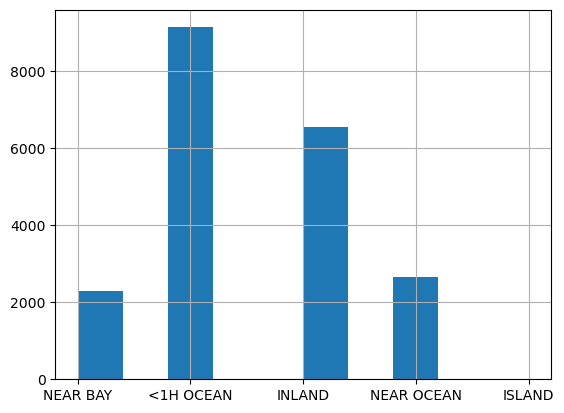

In [241]:
df_housing_dirty.ocean_proximity.hist()

In [242]:
most_freq = df_housing_dirty.ocean_proximity.value_counts().idxmax()

In [243]:
most_freq

'<1H OCEAN'

In [244]:
df_housing_dirty.ocean_proximity.fillna(most_freq, inplace=True)

In [245]:
df_housing_dirty.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<AxesSubplot:>

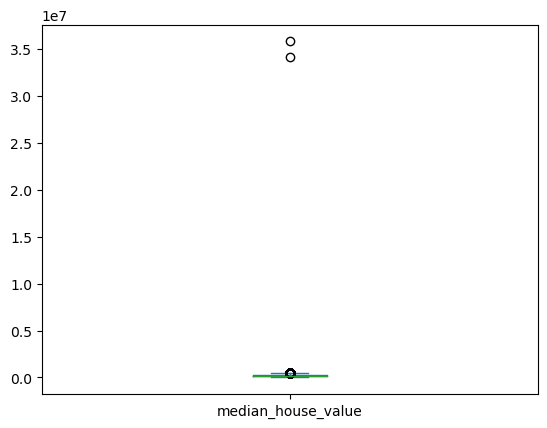

In [246]:
df_housing_dirty.median_house_value.plot.box()

In [247]:
# mu 
mean_value = df_housing_dirty.median_house_value.mean()
mean_value

210223.05378688764

In [248]:
std_value = df_housing_dirty.median_house_value.std()
std_value

361432.6479767345

In [249]:
df_housing_dirty['z_manual'] = (df_housing_dirty.median_house_value - mean_value)/std_value

In [250]:
df_housing_dirty.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,z_manual
0,-122.23,37.88,41.0,880,322,126,8.3252,452600,NEAR BAY,0.670601
1,-122.22,37.86,21.0,7099,2401,1138,8.3014,35850000,NEAR BAY,98.606966
2,-122.24,37.85,52.0,1467,496,177,7.2574,352100,NEAR BAY,0.392540
3,-122.25,37.85,52.0,1274,558,219,5.6431,34130000,NEAR BAY,93.848127
4,-122.25,37.85,52.0,1627,565,259,3.8462,342200,NEAR BAY,0.365149


In [251]:
df_housing_dirty['z_scipy'] = stats.zscore(df_housing_dirty.median_house_value)

In [252]:
df_housing_dirty

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,z_manual,z_scipy
0,-122.23,37.88,41.0,880,322,126,8.3252,452600,NEAR BAY,0.670601,0.670617
1,-122.22,37.86,21.0,7099,2401,1138,8.3014,35850000,NEAR BAY,98.606966,98.609355
2,-122.24,37.85,52.0,1467,496,177,7.2574,352100,NEAR BAY,0.392540,0.392550
3,-122.25,37.85,52.0,1274,558,219,5.6431,34130000,NEAR BAY,93.848127,93.850401
4,-122.25,37.85,52.0,1627,565,259,3.8462,342200,NEAR BAY,0.365149,0.365158
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,845,330,1.5603,78100,INLAND,-0.365554,-0.365563
20636,-121.21,39.49,18.0,697,356,114,2.5568,77100,INLAND,-0.368321,-0.368329
20637,-121.22,39.43,17.0,2254,1007,433,1.7000,92300,INLAND,-0.326266,-0.326274
20638,-121.32,39.43,18.0,1860,741,349,1.8672,84700,INLAND,-0.347293,-0.347301


In [253]:
df_housing_dirty = df_housing_dirty[(df_housing_dirty.z_scipy >= -3) & (df_housing_dirty.z_scipy <= 3)]

<AxesSubplot:>

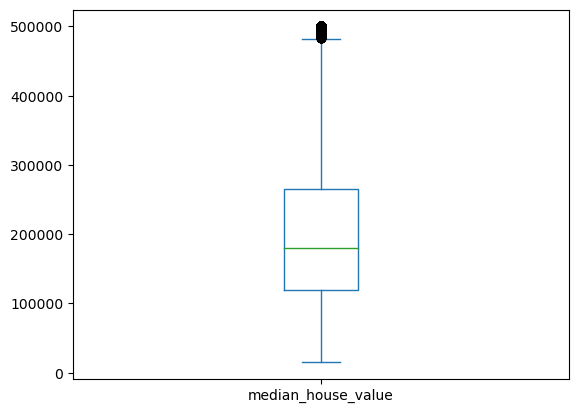

In [254]:
df_housing_dirty.median_house_value.plot.box()

<AxesSubplot:>

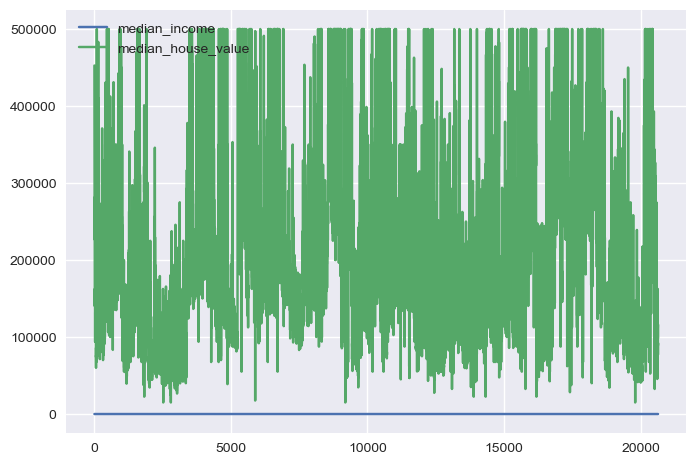

In [258]:
plt.style.use('seaborn')
df_housing_dirty[['median_income', 'median_house_value']].plot()



In [259]:
df_housing_dirty['z_house_value'] = df_housing_dirty.z_scipy

C:\Users\Lahm\AppData\Local\Temp\ipykernel_16684\654571784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_housing_dirty['z_house_value'] = df_housing_dirty.z_scipy


In [261]:
df_housing_dirty.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,z_manual,z_scipy,z_house_value
0,-122.23,37.88,41.0,880,322,126,8.3252,452600,NEAR BAY,0.670601,0.670617,0.670617
2,-122.24,37.85,52.0,1467,496,177,7.2574,352100,NEAR BAY,0.392540,0.392550,0.392550
4,-122.25,37.85,52.0,1627,565,259,3.8462,342200,NEAR BAY,0.365149,0.365158,0.365158
5,-122.25,37.85,52.0,919,413,193,4.0368,269700,NEAR BAY,0.164559,0.164563,0.164563
6,-122.25,37.84,52.0,2535,1094,514,3.6591,299200,NEAR BAY,0.246178,0.246184,0.246184


C:\Users\Lahm\AppData\Local\Temp\ipykernel_16684\3777680661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_housing_dirty['median_income_z'] = stats.zscore(df_housing_dirty.median_income)
C:\Users\Lahm\AppData\Local\Temp\ipykernel_16684\3777680661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_housing_dirty['median_house_value_z'] = stats.zscore(df_housing_dirty.median_house_value)


<AxesSubplot:>

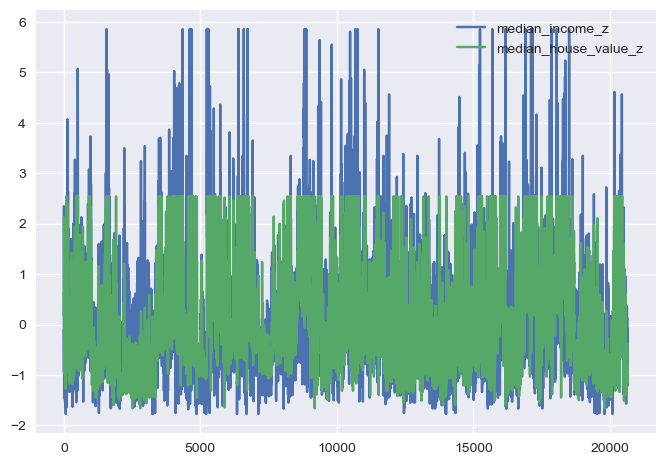

In [262]:
# standardization using z-score
df_housing_dirty['median_income_z'] = stats.zscore(df_housing_dirty.median_income)
df_housing_dirty['median_house_value_z'] = stats.zscore(df_housing_dirty.median_house_value)
df_housing_dirty[['median_income_z', 'median_house_value_z']].plot()